<a href="https://colab.research.google.com/github/archivesunleashed/notebooks/blob/main/css-file-information.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSS Information Dataset Exploration

We're going to take a look at a few examples of how we can explore the CSS Information dataset. 

The first thing we need to do is enter the URL for our CSS Information dataset in the cell below. You can get this by right clicking the Download icon, and selecting "Copy Link".

In [7]:
dataset = 'https://webdata.archive-it.org/ait/files/download/ARCHIVEIT-14489/TextFilesInformationExtraction/css-file-information.csv.gz?access=XW2XYZ64GNFSEQHOTCXP642EHRZOZF4P' #@param {type:"string"}
print(dataset)

https://webdata.archive-it.org/ait/files/download/ARCHIVEIT-14489/TextFilesInformationExtraction/css-file-information.csv.gz?access=XW2XYZ64GNFSEQHOTCXP642EHRZOZF4P


## pandas

Next, we'll set up our environment so we can load our CSS Information dataset into [pandas](https://pandas.pydata.org) DataFrames. If you're unfamiliar with DataFrames, but you've worked with spreadsheets before, you should feel comfortable pretty quick.

In [2]:
import pandas as pd

## Data Table Display

Colab includes an extension that renders pandas DataFrames into interactive displays that can be filtered, sorted, and explored dynamically. This can be very useful for taking a look at what each DataFrame provides, and doing some intital filtering!

Data table display for pandas dataframes can be enabled by running:
```python
%load_ext google.colab.data_table
```
and disabled by running
```python
%unload_ext google.colab.data_table
```

In [3]:
%load_ext google.colab.data_table

## Loading our ARCH Dataset as a DataFrame

---


Next, we'll create pandas DataFrame from our dataset, and show a preview of it using the Data Table Display.

In [9]:
css = pd.read_csv(dataset, compression='gzip', lineterminator='\n')
css

,crawl_date,url,filename,extension,mime_type_web_server,mime_type_tika,md5,sha1,content
0,20200629191708,https://www.ualberta.ca/_assets/css/framework.css,framework.css,txt,text/css,text/plain,c4be5b34fa1931a9b66289a1f96c0a51,134a403da8023665bf8fd2d1e44c284b3b155e45,/*!\r\n * Bootstrap v4.3.1 (https://getbootstr...
1,20200629191844,https://www.ualberta.ca/_assets/css/legacy-fra...,legacy-framework.css,txt,text/css,text/plain,5f51cd415d9fc150c94d8b48a6855b86,74465ecc06005a8a4ada5365e7b0a4ee1efe736a,".clearfix{*zoom:1}.clearfix:after,.clearfix:be..."
2,20200629192541,https://www.ualberta.ca/_assets/css/print.css,print.css,txt,text/css,text/plain,e3c531635c6f818d199cb37db395ac79,b1d70b3ddb97ce4310801274be463040942c2a45,"@media print{body{font:11pt Georgia,Times New ..."
3,20200629193059,https://www.ualberta.ca/_assets/css/legacy-fra...,legacy-framework-ie.css,txt,text/css,text/plain,919b7288cf8fa9b79494096b661027cb,1842b3e1394e93305229fdfff7ec23873a67e25b,".clearfix{*zoom:1}.clearfix:after,.clearfix:be..."
4,20200629202434,https://cdnjs.cloudflare.com/ajax/libs/twitter...,bootstrap.min.css,txt,text/css,text/plain,ec3bb52a00e176a7181d454dffaea219,6527d8bf3e1e9368bab8c7b60f56bc01fa3afd68,/*!\n * Bootstrap v3.3.7 (http://getbootstrap....
...,...,...,...,...,...,...,...,...,...
88096,20220704153616,https://www.uwo.ca/pridelib/_system/pridelib.css,pridelib.css,css,text/css,NaN,d41d8cd98f00b204e9800998ecf8427e,da39a3ee5e6b4b0d3255bfef95601890afd80709,NaN
88097,20220704154100,https://www.uwo.ca/pridelib/_system/blueprint/...,screen.css,css,text/css,NaN,d41d8cd98f00b204e9800998ecf8427e,da39a3ee5e6b4b0d3255bfef95601890afd80709,NaN
88098,20220704154201,https://www.uwo.ca/pridelib/_system/blueprint/...,print.css,css,text/css,NaN,d41d8cd98f00b204e9800998ecf8427e,da39a3ee5e6b4b0d3255bfef95601890afd80709,NaN
88099,20220704154255,https://www.uwo.ca/pridelib/_system/superfish-...,superfish.css,css,text/css,NaN,d41d8cd98f00b204e9800998ecf8427e,da39a3ee5e6b4b0d3255bfef95601890afd80709,NaN


# Data Analysis

Now that we have all of our datasets loaded up, we can begin to work with them!

## Counting total files, and unique files

Let's take a quick look at how to count items in DataFrames, and use total and unique files as an example to work with.

It's definitely work checking out the [pandas documentation](https://pandas.pydata.org/docs/index.html). There are a lot of good examples available, along with a robust [API reference](https://pandas.pydata.org/docs/reference/index.html#api).


### How many css files are in this collection?

We can take our `css` variable try a couple of functions to get the same answer.

1.   `len(css.index)`
  * Get the length of the DataFrame's index.
2.   `css.shape[0]`
  * Get the shape or dimensionality of the DataFrame, and take the first item in the tuple.
3.  `css.count()`
  * Count the number of rows for each column.



In [11]:
len(css.index)

88101

In [12]:
css.shape[0]

88101

In [13]:
css.count()

crawl_date              88101
url                     88101
filename                88052
extension               88101
mime_type_web_server    88101
mime_type_tika          18672
md5                     88101
sha1                    88101
content                 18672
dtype: int64

### How many unique css files are in the collection?

 We can see if an css files is unique or not by computing an [MD5 hash](https://en.wikipedia.org/wiki/MD5#MD5_hashes) of it, and comparing them. The exact same css file might have a filename of `example.jpg` or `foo.jpg`. If the hash is computed for each, we can see that even with different file names, they are actually the same css file. So, since we have both a `MD5` and `SHA1` hash column available in our DataFrame, we can just find the unique values, and count them!




In [14]:
len(css.md5.unique())

17237

### What are the top 10 most occurring css files in the collection?

Here we can take advantage of [`value_counts()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html) to provide us with a list of MD5 hashes, and their respective counts.

In [15]:
css["md5"].value_counts().head(10)

d41d8cd98f00b204e9800998ecf8427e    69429
0c78b9b65520315a2fb697db36bb453e       10
da002e99593b2cd3c57c06da331b21cf       10
ea5336b4064e6edb916b3da3c8f8a0be        9
269550530cc127b6aa5a35925a7de6ce        9
21d9d9df449caf1c50a6b24a7d37c8a6        8
3fd6bf194fe0784421357bd19f77c161        8
110caa93c3fff11bfabfe651d0135248        8
1162bec186856e63a6ca207b04282816        8
648ec873b4b9e80880653fbae1f5b235        8
Name: md5, dtype: int64


### What's the information around all of the occurances of `d41d8cd98f00b204e9800998ecf8427e`?

What, you mean you don't know what `d41d8cd98f00b204e9800998ecf8427e` means? 

Let's find those css files in the DataFrame. We can here see some of the filenames used, its dimensions, and its URL.


In [16]:
css.loc[css["md5"] == "d41d8cd98f00b204e9800998ecf8427e"]

,crawl_date,url,filename,extension,mime_type_web_server,mime_type_tika,md5,sha1,content
15,20200629235334,https://cloudfront.ualberta.ca/design/custom/m...,custom.css,css,text/css,NaN,d41d8cd98f00b204e9800998ecf8427e,da39a3ee5e6b4b0d3255bfef95601890afd80709,NaN
24,20200630021950,https://cloudfront.ualberta.ca/design/custom/g...,custom.css,css,text/css,NaN,d41d8cd98f00b204e9800998ecf8427e,da39a3ee5e6b4b0d3255bfef95601890afd80709,NaN
33,20200704160858,https://cloudfront.ualberta.ca/design/custom/c...,custom.css,css,text/css,NaN,d41d8cd98f00b204e9800998ecf8427e,da39a3ee5e6b4b0d3255bfef95601890afd80709,NaN
34,20200704193328,https://cloudfront.ualberta.ca/design/custom/e...,custom.css,css,text/css,NaN,d41d8cd98f00b204e9800998ecf8427e,da39a3ee5e6b4b0d3255bfef95601890afd80709,NaN
35,20200704193351,https://cloudfront.ualberta.ca/design/custom/b...,custom.css,css,text/css,NaN,d41d8cd98f00b204e9800998ecf8427e,da39a3ee5e6b4b0d3255bfef95601890afd80709,NaN
...,...,...,...,...,...,...,...,...,...
88096,20220704153616,https://www.uwo.ca/pridelib/_system/pridelib.css,pridelib.css,css,text/css,NaN,d41d8cd98f00b204e9800998ecf8427e,da39a3ee5e6b4b0d3255bfef95601890afd80709,NaN
88097,20220704154100,https://www.uwo.ca/pridelib/_system/blueprint/...,screen.css,css,text/css,NaN,d41d8cd98f00b204e9800998ecf8427e,da39a3ee5e6b4b0d3255bfef95601890afd80709,NaN
88098,20220704154201,https://www.uwo.ca/pridelib/_system/blueprint/...,print.css,css,text/css,NaN,d41d8cd98f00b204e9800998ecf8427e,da39a3ee5e6b4b0d3255bfef95601890afd80709,NaN
88099,20220704154255,https://www.uwo.ca/pridelib/_system/superfish-...,superfish.css,css,text/css,NaN,d41d8cd98f00b204e9800998ecf8427e,da39a3ee5e6b4b0d3255bfef95601890afd80709,NaN


### What are the top 10 most occuring filenames in the collection?

Note that this is of course different than the MD5 results up above. Here we are focusing _just_ on filename. So `styles.css for example, might actually be referring to different css files who happen to have the same name.

Here we can use `value_counts()` again, but this time we'll create a variable for the top filenames so we can use it later.



In [17]:
top_filenames = css["filename"].value_counts().head(10)
top_filenames

styles.css              3242
style.css               1694
css                     1226
ctools.css               679
views.css                602
node.css                 590
field.css                586
user.css                 573
font-awesome.min.css     565
system.messages.css      553
Name: filename, dtype: int64

### Let's create our first graph!

We'll plot the data first with pandas [plot](https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html) functionality, and then plot the data with [Altair](https://altair-viz.github.io/).

Text(0, 0.5, 'Count')

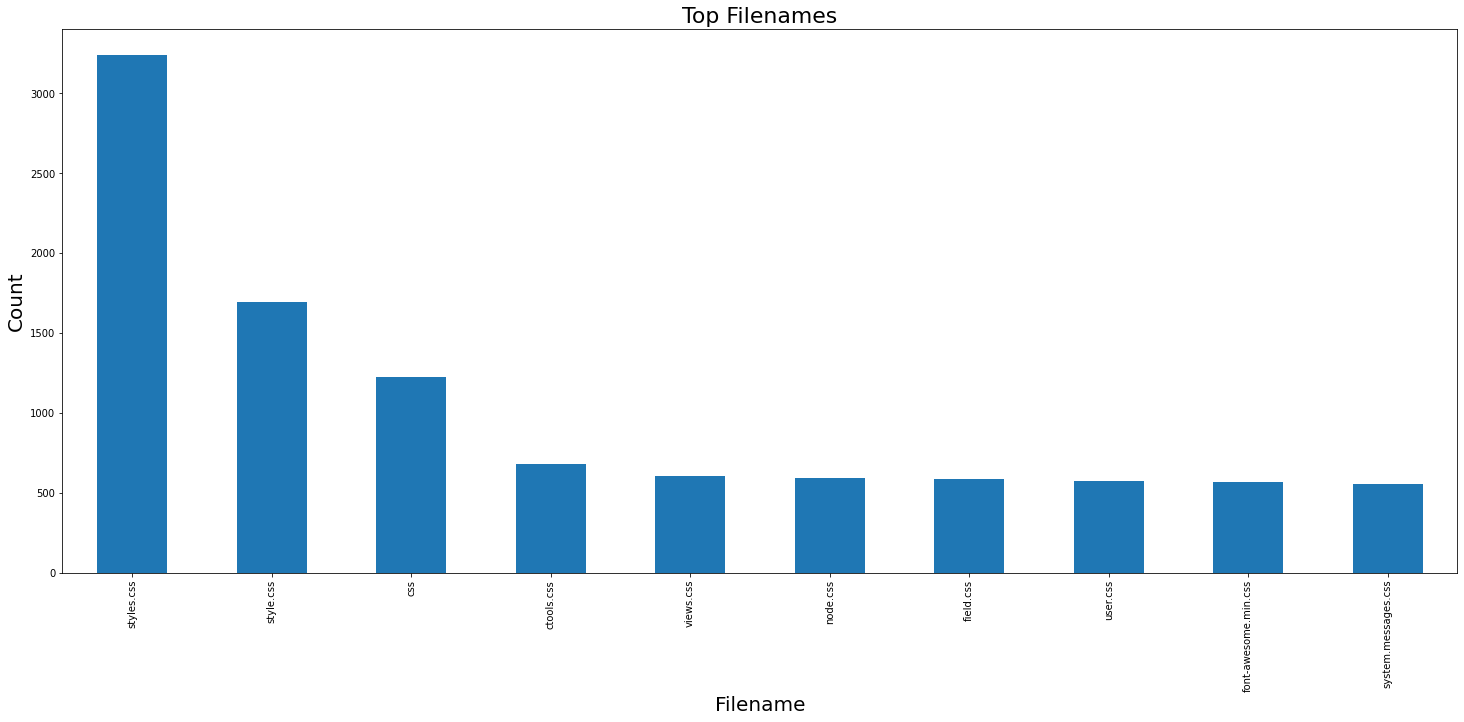

In [18]:
top_filenames_chart = top_filenames.plot.bar(figsize=(25, 10))

top_filenames_chart.set_title("Top Filenames", fontsize=22)
top_filenames_chart.set_xlabel("Filename", fontsize=20)
top_filenames_chart.set_ylabel("Count", fontsize=20)

Now let's setup [Altair](https://altair-viz.github.io/), and plot the data with Altair. Altair is useful for creating vizualizations since they can be easily exported as a PNG or SVG.

In [19]:
import altair as alt

In [20]:
top_filenames_altair = (
    css["filename"]
    .value_counts()
    .head(10)
    .rename_axis("Filename")
    .reset_index(name="Count")
)

filenames_bar = (
    alt.Chart(top_filenames_altair)
    .mark_bar()
    .encode(x=alt.X("Filename:O", sort="-y"), y=alt.Y("Count:Q"))
)

filenames_rule = (
    alt.Chart(top_filenames_altair).mark_rule(color="red").encode(y="mean(Count):Q")
)


filenames_text = filenames_bar.mark_text(align="center", baseline="bottom").encode(
    text="Count:Q"
)

(filenames_bar + filenames_rule + filenames_text).properties(
    width=1400, height=700, title="Top Filenames"
)

alt.LayerChart(...)

### How about a file format distribution?

What _kind_ of css files are present? We can discover this by checking their "media type", or [MIME type](https://en.wikipedia.org/wiki/Media_type). 






In [21]:
css_mime_types = (
    css["mime_type_tika"]
    .value_counts()
    .head(5)
    .rename_axis("MIME Type")
    .reset_index(name="Count")
)

css_mimes_bar = (
    alt.Chart(css_mime_types)
    .mark_bar()
    .encode(x=alt.X("MIME Type:O", sort="-y"), y=alt.Y("Count:Q"))
)

css_mime_rule = (
    alt.Chart(css_mime_types).mark_rule(color="red").encode(y="mean(Count):Q")
)

css_mime_text = css_mimes_bar.mark_text(align="center", baseline="bottom").encode(
    text="Count:Q"
)

(css_mimes_bar + css_mime_rule + css_mime_text).properties(
    width=1400, height=700, title="CSS File Format Distribution"
)

alt.LayerChart(...)

### How do I get the actual css?

...or, how do I get to the actual binary files described by each file format information derivative?

There are a few options!

1. `wget` or `curl` from the live URL, or a replay URL
  * Live web URL
    * `wget` or `curl` the value of the `url` column
  * Replay web URL
    * `wget` or `curl` the value of the `crawl_date` and `url` column using the following pattern:
      * `https://web.archive.org/web/` + `crawl_date` + `/` + `url`
        * https://web.archive.org/web/20120119124734/http://www.archive.org/images/glogo.png
      * `http://wayback.archive-it.org/14462/` + `crawl_date` + `/` + `url`
        * https://wayback.archive-it.org/14462/20210524212740/https://ruebot.net/visualization/elxn42/featured_hu33a17dfb90e2c5ed77f783db14a6e53a_5126291_550x0_resize_q90_box_2.png
2. Use a scripting language, such as Python
  * Make use of the `url` and `filename` columns (and `crawl_date` if you want to use the replay URL)
  * `import requests`
  * `requests.get(url, allow_redirects=True)`
  * `open('filename', 'wb').write(r.content)`
3. Use the [Archives Unleashed Toolkit](https://aut.docs.archivesunleashed.org/docs/extract-binary) (if you have access to the W/ARC files).

If you wanted to download the css files using the replay URL, below a method for doing so.

First, you'll want to setup a replay url base url. Here we'll use the Archive-It Wayback instance for the collection.

In [22]:
wayback_url = 'http://wayback.archive-it.org/89/'

Next we'll create a new column using a lambda function. If you're familiar working with spreadsheets, what we're doing here is basically concatenating some column values together and creating a new column.

In [23]:
css['replay_url'] = css.apply(lambda row: str(wayback_url + str(row['crawl_date']) + "/" + row['url']), axis=1)

Then we can export that new column we created out to a file, so we can use it with `wget` to download all the css files!

In [24]:
css['replay_url'].head().to_csv('89_css_urls.txt', index=False, header=False)

Finally, we can pass the file to `wget` to use as a download list. You can also speed this process up using `xargs` or `parallel`.

In [25]:
!wget --random-wait -i 89_css_urls.txt

--2022-11-24 19:47:59--  http://wayback.archive-it.org/89/20200629191708/https://www.ualberta.ca/_assets/css/framework.css
Resolving wayback.archive-it.org (wayback.archive-it.org)... 207.241.232.8, 207.241.225.8
Connecting to wayback.archive-it.org (wayback.archive-it.org)|207.241.232.8|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘framework.css’

framework.css           [ <=>                ]   4.50K  --.-KB/s    in 0s      

2022-11-24 19:48:00 (27.9 MB/s) - ‘framework.css’ saved [4613]

--2022-11-24 19:48:00--  http://wayback.archive-it.org/89/20200629191844/https://www.ualberta.ca/_assets/css/legacy-framework.css
Reusing existing connection to wayback.archive-it.org:80.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘legacy-framework.css’

legacy-framework.cs     [ <=>                ]   4.50K  --.-KB/s    in 0s      

2022-11-24 19:48:00 (34.7 MB/s) - ‘legacy-framework.css’ s